# Fourier Transform and Spectral Analyses

## Introduction

The Fourier Transform is a fundamental tool in computational astrophysics and many other fields of science and engineering.
It allows for the decomposition of complex functions or signals into sums of sinusoidal components, facilitating the analysis of their frequency content.
This capability is essential for understanding various phenomena, from the distribution of matter in the universe to the behavior of signals received from distant astronomical objects.

The development of the Fast Fourier Transform (FFT) algorithm significantly advanced computational methods in the 20th century.
The FFT reduces the computational complexity of performing Fourier Transforms from $\mathcal{O}(N^2)$ to $\mathcal{O}(N \log N)$, enabling efficient processing of large datasets typical in astronomical observations and simulations.
Its applications include:

* Communication Systems:
  * Signal Processing: Fundamental in digital communication for encoding and decoding signals, allowing efficient data transmission over various frequencies without interference.
  * Compression: Techniques like MP3 (audio) and JPEG (image) rely on Fourier Transform methods to compress data by transforming signals into frequency components and discarding less significant ones.
    
* Radar and Sonar:
  * Object Detection: Helps interpret reflected electromagnetic or sound waves to determine the distance, speed, and characteristics of objects, crucial for navigation, meteorology, and defense.
  * Doppler Shifts: Analyzing frequency shifts in returned signals enables calculation of the velocity of moving objects.
    
* Astronomy:
  * Spectroscopy: Used to analyze light spectra from celestial objects, determining their composition, temperature, velocity, and other properties.
  * Imaging: Employed in reconstructing images from interferometric data, enhancing resolution beyond the limitations of individual telescopes.
  * Very Long Baseline Interferometry (VLBI): Combines data from multiple telescopes across vast distances to simulate a telescope the size of Earth, relying on Fourier analysis to synthesize high-resolution images of distant astronomical sources.

### Historical Context and the Heat Equation

The origins of Fourier analysis trace back to the early 19th century with the work of Jean-Baptiste Joseph Fourier (1768–1830), a French mathematician and physicist.
While studying heat flow, Fourier introduced the revolutionary idea that any periodic function could be expressed as an infinite sum of sine and cosine functions—known today as the Fourier Series.

The one-dimensional heat equation is:
\begin{align}
\frac{\partial u(x,t)}{\partial t} = \alpha \frac{\partial^2 u(x,t)}{\partial x^2},
\end{align}
where $u(x,t)$ is the temperature distribution along a rod at position $x$ and time $t$, and $\alpha$ is the thermal diffusivity constant of the material.

### Solution Using Separation of Variables

We use the method of separation of variables to solve the heat equation, which involves assuming the solution can be written as a product of functions, each depending only on a single variable:
\begin{align}
u(x,t) = X(x) T(t).
\end{align}
Substituting into the heat equation:
\begin{align}
X(x) \frac{dT(t)}{dt} = \alpha T(t) \frac{d^2 X(x)}{dx^2}.
\end{align}
Dividing both sides by $X(x) T(t)$, we obtain:
\begin{align}
\frac{1}{T(t)} \frac{dT(t)}{dt} = \alpha \frac{1}{X(x)} \frac{d^2 X(x)}{dx^2}.
\end{align}

Since the left side depends only on $t$ and the right side only on $x$, both sides must equal a constant $-\lambda$:
\begin{align}
\frac{1}{T(t)} \frac{dT(t)}{dt} = -\lambda = \alpha \frac{1}{X(x)} \frac{d^2 X(x)}{dx^2}.
\end{align}
This yields two ordinary differential equations (ODEs):
1. Temporal Equation: $\frac{dT(t)}{dt} + \lambda T(t) = 0$.
2. Spatial Equation: $\frac{d^2 X(x)}{dx^2} + \frac{\lambda}{\alpha} X(x) = 0$.

The general solution to the spatial equation is:
\begin{align}
X(x) = A \sin(kx) + B \cos(kx),
\end{align}
where $k^2 = \lambda / \alpha$.
This form of solution originates from the second-order derivative.

Assuming Dirichlet boundary conditions for a rod of length $L$:
\begin{align}
u(0,t) = u(L,t) = 0,
\end{align}
we find:
* At $x = 0$, $X(0) = 0 \implies B = 0$.
* At $x = L$, non-trivial solutions ($A \neq 0$) require:
  \begin{align}
  \sin(kL) = 0 \implies kL = n\pi, \quad n = 1,2,3,\dots
  \end{align}

Thus, the "eigenvalues" are:
\begin{align}
k_n = \frac{n\pi}{L},
\end{align}
and the eigenfunctions are:
\begin{align}
X_n(x) = \sin\left( \frac{n\pi x}{L} \right).
\end{align}

With $\lambda_n = \alpha k_n^2$, the temporal ODE becomes:
\begin{align}
\frac{dT_n(t)}{dt} + \alpha \left( \frac{n\pi}{L} \right)^2 T_n(t) = 0,
\end{align}
with solution:
\begin{align}
T_n(t) = C_n \exp\left[ -\alpha \left( \frac{n\pi}{L} \right)^2 t \right].
\end{align}

Combining spatial and temporal parts and realizing the heat equation is linear, the general solution is the sum of all solutions:
\begin{align}
u(x,t) = \sum_{n=1}^\infty C_n \sin\left( \frac{n\pi x}{L} \right) \exp\left[ -\alpha \left( \frac{n\pi}{L} \right)^2 t \right],
\end{align}
and the coefficients $C_n$ are determined from the initial condition $u(x,0) = f(x)$:
\begin{align}
C_n = \frac{2}{L} \int_0^L f(x) \sin\left( \frac{n\pi x}{L} \right) dx.
\end{align}
This represents the Fourier sine series expansion of $f(x)$.

## Fourier Series: Foundation and Interpretation

In many physical systems, including those encountered in astrophysics, functions describing phenomena are often periodic or can be approximated as such over certain intervals.
The Fourier Series provides a powerful method to represent these periodic functions as infinite sums of simpler sinusoidal functions—sines and cosines.
This enables us to break down complex periodic functions and simplifies analysis and computation.

Since many physical systems can be described by harmonic components, the Fourier Series naturally enables physical interpretation.
In astrophysics, signals received from observations can be decomposed to analyze their frequency content.

A function $f(x)$ is said to be periodic with period $L$ if:
\begin{align}
f(x + L) = f(x) \quad \text{for all } x.
\end{align}

Any reasonably well-behaved, periodic function $f(x)$ with period $L$ can be expressed as a Fourier Series:
\begin{align}
f(x) = \frac{A_0}{2} + \sum_{n=1}^\infty \left[ A_n \cos\left( \frac{2n\pi x}{L} \right) + B_n \sin\left( \frac{2n\pi x}{L} \right) \right].
\end{align}
$A_n$ and $B_n$ are the Fourier coefficients, which quantify the contribution of each harmonic component.

The coefficients are calculated using the orthogonality properties of sine and cosine functions:
\begin{align}
A_n &= \frac{2}{L} \int_{-L/2}^{L/2} f(x) \cos\left( \frac{2n\pi x}{L} \right) dx, \quad n = 0,1,2,\dots \\
B_n &= \frac{2}{L} \int_{-L/2}^{L/2} f(x) \sin\left( \frac{2n\pi x}{L} \right) dx, \quad n = 1,2,3,\dots
\end{align}

### Inner Products and Hilbert Spaces

An inner product in a function space is a generalization of the dot product from finite-dimensional vector spaces to infinite-dimensional spaces of functions.
For functions $f(x)$ and $g(x)$ defined over an interval $[a, b]$, the inner product is defined as:
\begin{align}
\langle f, g \rangle = \int_a^b f(x) g^*(x) \, dx,
\end{align}
where $g^*(x)$ denotes the complex conjugate of $g(x)$.

The sine and cosine functions used in the Fourier Series form an orthogonal (and can be normalized to be orthonormal) set with respect to this inner product:
\begin{align}
  \left\langle \cos\left( \frac{2n\pi x}{L} \right), \cos\left( \frac{2m\pi x}{L} \right) \right\rangle =
  \begin{cases}
    0,   & n \ne m, \\
    L/2, & n = m,
  \end{cases}
\end{align}
and similarly for the sine functions.

A Hilbert space is a complete vector space equipped with an inner product.
Functions that are square-integrable over a given interval form a Hilbert space, denoted as $L^2([a, b])$.
The Fourier Series represents functions in $L^2$ as infinite linear combinations of orthonormal basis functions.

By projecting a function onto the orthonormal basis of sines and cosines, we obtain the Fourier coefficients, which serve as the "coordinates" of the function in this function space.
Thus, the Fourier Series can be viewed as a coordinate transformation from the "time" or "spatial" domain to the "frequency" or "wavenumber" domain.
This transformation is analogous to expressing a vector in terms of its components along orthogonal axes in finite-dimensional space.

### Example

Consider a square wave function defined over the interval $[-L/2, L/2)$:
\begin{align}
  f(x) =
  \begin{cases}
     1, & 0 < x < L/2, \\
    -1, & -L/2 < x < 0.
  \end{cases}
\end{align}

The Fourier coefficients for this function can be computed using the integrals above.
Due to the function's odd symmetry, only sine terms are present (i.e., $A_n = 0$).
The Fourier coefficients $B_n$ are:
\begin{align}
  B_n = \frac{4}{n\pi}
  \begin{cases}
    0, & \text{even } n, \\
    1, & \text{odd } n.
  \end{cases}
\end{align}
This series expansion demonstrates how complex functions can be represented as infinite sums of simple orthogonal functions.

We can implement the Fourier Series representation of functions using Python.
We compute the Fourier coefficients numerically and reconstruct the original function from these coefficients.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, L):
    return np.where((x % L) < L/2, 1, -1)

def f_approx(x, L, N):
    fsum = np.zeros_like(x)
    for n in range(1, N + 1, 2):  # sum over odd n
        B = 4 / (n * np.pi)
        fsum += B * np.sin(2 * n * np.pi * x / L)
    return fsum

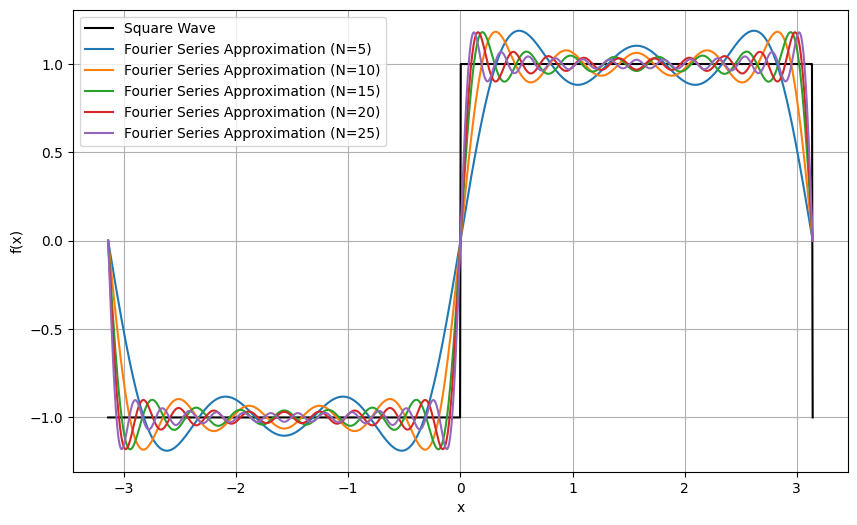

In [3]:
L  = 2 * np.pi # Period is 2 pi
xi = np.linspace(-L/2, L/2, 1000)

# Plotting
plt.figure(figsize=(10, 6))

# Original function
fi = f(xi, L)
plt.plot(xi, fi, label='Square Wave', color='k')

# Fourier series approximation
N = list(range(5,100,5))
for n in N[:5]:
    fi_n = f_approx(xi, L, n)
    plt.plot(xi, fi_n, label=f'Fourier Series Approximation (N={n})')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

Near points of discontinuity in the function (e.g., the jumps in a square wave), the Fourier series overshoots the function's value.
This overshoot does not diminish as more terms are added;
instead, the maximum overshoot approaches a finite limit ($\sim 9\%$ of the jump's magnitude).
This is known as the Gibbs Phenomenon.

## Implementing Fourier Series in Python

We will implement the Fourier Series representation of functions using Python.
We will compute the Fourier coefficients numerically and reconstruct the original function from these coefficients.

In [ ]:
def An(f, x, L, n):
    I = f(x) * np.cos(2 * n * np.pi * x / L)
    return (2 / L) * np.trapezoid(I, x)

def Bn(f, x, L, n):
    I = f(x) * np.sin(2 * n * np.pi * x / L)
    return (2 / L) * np.trapezoid(I, x)

In [ ]:
def Fourier_coefficients(f, x, L, N):
    A = [An(f, x, L, n) for n in range(0, N)]
    B = [Bn(f, x, L, n) for n in range(0, N)]
    return A, B

In [ ]:
def Fourier_series(A, B, L, x):
    fsum = (A[0]/2) * np.ones_like(x)
    for n, An in enumerate(A[1:],1):
        fsum += An * np.cos(2 * n * np.pi * x / L)
    for n, Bn in enumerate(B[1:],1):
        fsum += Bn * np.sin(2 * n * np.pi * x / L)
    return fsum

Now, we can obtain Fourier series numerically using arbitrary functions.

In [ ]:
def f(x): # closure on L
    a = -L/2
    b =  L/2
    x = (x - a) % (b - a) + a
    return np.exp(-x*x*32)

xi = np.linspace(-L/2, L/2, 10_000)
A, B = Fourier_coefficients(f, xi, L, 100)

In [ ]:
plt.figure(figsize=(10, 6))

# Original function
xi = np.linspace(-L, L, 20_000)
fi = f(xi)
plt.plot(xi, fi, color='k', label='Original function')

# Fourier series approximation
N    = list(range(5,100,5))
fi_N = [Fourier_series(A[:n], B[:n], L, xi) for n in N]
for n, fi_n in list(zip(N, fi_N))[:5]:
    plt.plot(xi, fi_n, label=f'Fourier Series Approximation (N={n})')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

### Error Analysis

We can quantify how the approximation improves with $N$ by calculating the Mean Squared Error (MSE) between the original function and its Fourier series approximation.

In [ ]:
def mse(f, f_N):
    df = (f - f_N)
    return np.sqrt(np.mean(df * df))

errs = []
for fi_n in fi_N:
    errs.append(mse(fi, fi_n))

plt.loglog(N, errs, label='Error')
plt.loglog(N, 1/np.array(N), label=r'$N^{-1}$')
plt.legend()

Try adjust different functions and observe how the errors behave.

## Complex Fourier Series

It is often convenient to combine the sine and cosine in the Fourier series into a single exponential term using Euler's formula:
\begin{align}
e^{i\theta} = \cos(\theta) + i\sin(\theta).
\end{align}
Therefore,
\begin{align}
\cos(\theta) &= \frac{e^{i\theta} + e^{-i\theta}}{2}, \\
\sin(\theta) &= \frac{e^{i\theta} - e^{-i\theta}}{2i}.
\end{align}
Substituting these into the definition of the Fourier series, we obtain the Complex Fourier Series:
\begin{align}
f(x) = \sum_{n=-\infty}^{\infty} C_n e^{i n \omega_1 x},
\end{align}
where $\omega_1 = 2\pi/L$ is the fundamental angular frequency.

The complex coefficients $C_n$ are given by:
\begin{align}
C_n = \frac{1}{L} \int_{-L/2}^{L/2} f(x) e^{-i n \omega_1 x} dx.
\end{align}

```{admonition} Exercises
What are the relationship between the complex Fourier coefficients $C_n$ and the Fourier series coefficients $A_n$ and $B_n$?
```

If $f(x)$ is purely real, then the complex Fourier coefficients satisfy the conjugate symmetry:
\begin{align}
C_{-n} = C_n^*,
\end{align}
where $C_n^*$ denotes the complex conjugate of $C_n$.
This property, sometimes referred as Hermitian, Hermit symmetry, or conjugate symmetry, ensures that the Fourier series representation remains real-valued.

```{admonition} Exercises
Demonstrate the Hermit symmetry using the relationship between the complex Fourier coefficients $C_n$ and the Fourier series coefficients $A_n$ and $B_n$ derived above.
```

In the context of complex Fourier series, the functions $\exp(i n \omega_1 x)$ form an orthonormal set under the inner product:
\begin{align}
\langle e^{i n \omega_1 x}, e^{i m \omega_1 x} \rangle = \int_{-L/2}^{L/2} e^{i n \omega_1 x} e^{-i m \omega_1 x} dx = L \delta_{n m},
\end{align}
where $\delta_{n m}$ is the Kronecker delta function.

The Fourier coefficients $C_n$ are obtained by projecting $f(x)$ onto these orthonormal basis functions, analogous to finding the components of a vector along orthogonal axes.
Thus, the Fourier series expansion is a coordinate transformation from the function space to the space spanned by the basis functions $\exp(i n \omega_1 x)$.

## Transition to Fourier Transform

In the previous sections, we explored how periodic functions can be represented as sums of sines and cosines using Fourier Series.
However, many functions of interest in physics and engineering are not periodic or are defined over an infinite domain.
To analyze such functions, we need to extend the concept of Fourier Series to the Fourier Transform.

### From Discrete to Continuous Spectrum

For a function $f(x)$ with period $L$, the Fourier Series has discrete frequencies $\omega_n = 2n\pi/L \equiv n \omega_1$.

As the period $L$ becomes infinitely large ($L \rightarrow \infty$), the spacing between the frequencies in the Fourier Series becomes infinitesimally small, turning the sum into an integral:
\begin{align}
\sum_{n=-\infty}^{\infty} \rightarrow
\int_{-\infty}^{\infty} \frac{d\omega}{\omega_1}.
\end{align}

The discrete set of frequencies $\omega_n$ becomes a continuous variable $\omega$.
This limit leads us to the Fourier Transform, which represents non-periodic functions defined over the entire real line.

### Complex Fourier Transform Definitions

The Fourier Transform $F(\omega)$ of a function $f(x)$ is defined as:
\begin{align}
F(\omega) = \int_{-\infty}^{\infty} f(x) e^{-i \omega x} dx.
\end{align}
The Inverse Fourier Transform is:
\begin{align}
f(x) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega x} d\omega.
\end{align}
These equations allow us to transform a time-domain function $f(x)$ into its frequency-domain representation $F(\omega)$, and vice versa.

If $f(x)$ is real-valued, then $F(-\omega) = F^*(\omega)$, similar to the Fourier series case.
This property ensures that the inverse transform yields a real function.

In the context of the Fourier Transform, the inner product between two functions $f(x)$ and $g(x)$ over the entire real line is:
\begin{align}
\langle f, g \rangle = \int_{-\infty}^{\infty} f(x) g^*(x) \, dx.
\end{align}
The functions $e^{i \omega x}$ form an orthogonal set with respect to this inner product.
As a result, similar to the Fourier Series, the Fourier Transform can be seen as projecting $f(x)$ onto the infinite-dimensional basis of complex exponentials $e^{i \omega x}$.
The transform coefficients $F(\omega)$ represent the "coordinates" of $f(x)$ in the frequency domain.

## Sampling Theory and Discrete Fourier Transform (DFT)

In this section, we delve into the implications of sampling continuous signals, introduce the Nyquist Sampling Theorem, explore the phenomenon of aliasing, and explain the role of the Discrete Fourier Transform (DFT) in analyzing discrete signals.
For clarity, we will switch our notation from $f(x)$ to $f(t)$, emphasizing the temporal aspect of signals.

### Sampling Continuous Signals

When working with real-world signals, we often need to convert continuous signals into discrete ones for digital processing.
This conversion is achieved through sampling, where a continuous signal $f(t)$ is measured at discrete intervals.
The distinction between continuous and discrete signals is fundamental:

* Continuous Signal: A function $f(t)$ defined for all real values of $t$.
* Discrete Signal:   A sequence of values $f_n = f(n T_s)$, where $T_s$ is the sampling interval (the time between samples) and $n$ is an integer index.

The sampling frequency $f_s$ is the reciprocal of the sampling interval, $f_s = \frac{1}{T_s}$, and the sampling angular frequency is $\omega_s = 2\pi f_s$.

Understanding how to sample a continuous signal without losing essential information is critical.
If the sampling rate is too low, important details in the signal may be missed, leading to errors in analysis.

### The Nyquist Sampling Theorem

The Nyquist Sampling Theorem provides a criterion for the minimum sampling rate required to reconstruct a continuous signal from its samples without loss of information.
It states:

A band-limited continuous-time signal with maximum frequency $f_{\text{max}}$ can be perfectly reconstructed from its samples if the sampling frequency $f_s$ is greater than twice the maximum frequency of the signal:
\begin{align}
f_s > 2 f_{\text{max}},
\end{align}
where the Nyquist Rate is the minimum sampling rate required, $f_{\text{Nyquist}} = 2 f_{\text{max}}$; and the Nyquist Frequency is half the sampling frequency, $f_{\text{Nyquist}} = \frac{f_s}{2}$.

Sampling above the Nyquist rate ensures that high-frequency components of the signal do not overlap (a phenomenon known as aliasing), which would cause distortion and loss of information.
Under ideal conditions, if a signal is band-limited (contains no frequencies higher than $f_{\text{max}}$), sampling it at a rate higher than the Nyquist rate allows for perfect reconstruction of the original continuous signal from its discrete samples.

### Aliasing Errors

Aliasing occurs when a continuous signal is sampled at a rate insufficient to capture its changes accurately.
This under-sampling causes different frequency components to become indistinguishable in the sampled signal.
High-frequency components (above the Nyquist frequency) are effectively "folded" back into lower frequencies, leading to distortion.

To visualize aliasing, consider the following example:

In [ ]:
# Parameters
f_signal = 3  # Frequency of the original signal in Hz
f_alias  = 1  # Aliased frequency in Hz (due to undersampling)
f_s      = 4  # Sampling frequency in Hz (below Nyquist rate)
t_end    = 2  # Duration in seconds

# Time arrays
t_cont = np.linspace(0, t_end, 1000) # Continuous time
t_s = np.arange(0, t_end, 1 / f_s)   # Discrete sampling times

# Signals
x_cont  = np.sin(2 * np.pi * f_signal * t_cont)  # Original continuous signal
x_alias =-np.sin(2 * np.pi * f_alias  * t_cont)  # Aliased signal for comparison
x_s     = np.sin(2 * np.pi * f_signal * t_s)     # Sampled signal

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t_cont, x_cont,  label='Original Signal (3 Hz)',      color='blue')
plt.plot(t_cont, x_alias, label='Aliased Signal (1 Hz)',       color='orange', linestyle='--')
plt.scatter(t_s, x_s,     label=f'Sampled Points at {f_s} Hz', color='red', zorder=5)

plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

In this example, the original signal at 3 Hz is sampled at 4 Hz, which is below the Nyquist rate of 6 Hz (twice the signal frequency).
The sampled points misrepresent the original signal, making it appear as if it has a frequency of 1 Hz.
This misrepresentation is the essence of aliasing.

## Discrete Fourier Transform (DFT)

When working with digital signals, especially in computational astrophysics and signal processing, we often deal with discrete data rather than continuous functions.
The Discrete Fourier Transform (DFT) is a mathematical tool that allows us to analyze the frequency content of discrete signals.
It transforms a finite sequence of equally spaced samples of a function into a sequence of complex numbers representing the signal's frequency spectrum.

### Definition of the DFT

Given a sequence of $N$ complex numbers $f_n$, where $n = 0, 1, 2, \dots, N-1$, the Discrete Fourier Transform $F_k$ is defined as:
\begin{align}
F_k = \sum_{n=0}^{N-1} f_n \, e^{-i 2\pi k n / N}, \quad \text{for } k = 0, 1, 2, \dots, N-1.
\end{align}

Here, $F_k$ represents the amplitude and phase of the $k$-th frequency component of the signal.
The inverse DFT, which allows us to reconstruct the original signal from its frequency components, is given by:
\begin{align}
f_n = \frac{1}{N} \sum_{k=0}^{N-1} F_k \, e^{i 2\pi k n / N}, \quad \text{for } n = 0, 1, 2, \dots, N-1.
\end{align}

### Properties of the DFT

Understanding the properties of the DFT is crucial for effectively applying it to signal analysis:

* Periodicity: Both the input sequence $f_n$ and the output sequence $F_k$ are periodic with period $N$.
  This means that $f_{n+N} = f_n$ and $F_{k+N} = F_k$ for all integers $n$ and $k$.
  The periodicity arises from the finite length of the sequences and the assumption that they represent one period of a periodic signal.

* Orthogonality: The set of complex exponentials $e^{-i 2\pi k n / N}$ used in the DFT are orthogonal over the interval $n = 0, 1, \dots, N-1$.
  This orthogonality allows the DFT to decompose the signal into independent frequency components, analogous to how the Fourier Series decomposes continuous periodic functions.

* Linearity: The DFT is a linear transformation.
  If $f_n$ and $g_n$ are sequences and $a$ and $b$ are scalars, then the DFT of $a f_n + b g_n$ is $a F_k + b G_k$, where $F_k$ and $G_k$ are the DFTs of $f_n$ and $g_n$, respectively.

* Energy Conservation (Parseval's Theorem, see below): The total energy of the signal is preserved between the time domain and the frequency domain.
  Specifically, the sum of the squares of the magnitudes of the time-domain samples equals $1/N$ times the sum of the squares of the magnitudes of the frequency-domain coefficients.

### Implementing the DFT in Python

To gain a deeper understanding of how the DFT works, we can implement it directly in Python.
Although practical applications use optimized algorithms like the Fast Fourier Transform (FFT), implementing the DFT from scratch helps illustrate the underlying computations.

Here is a simple implementation:

In [ ]:
def DFT(f):
    N = len(f)
    F = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            F[k] += f[n] * np.exp(-2j * np.pi * k * n / N)
    return F

In this function, we compute each frequency component $F_k$ by summing over all time-domain samples $f_n$, weighted by the complex exponential basis functions.
The nested loops result in a computational complexity of $\mathcal{O}(N^2)$, which is acceptable for small $N$ but inefficient for large datasets.

Let's apply the DFT to analyze a discrete signal composed of a single sine wave:

In [ ]:
# Signal parameters
f_signal = 5   # Frequency in Hz
f_s      = 50  # Sampling frequency in Hz
N        = 100 # Number of samples

# Time vector
t = np.arange(N) / f_s

# Signal generation
f = np.sin(2 * np.pi * f_signal * t)

# Compute the DFT
F = DFT(f)

# Frequency vector
freq = np.fft.fftfreq(N, d=1/f_s)

# Plotting
plt.figure(figsize=(10, 6))
plt.stem(freq[:N // 2], np.abs(F[:N // 2])*(2/N), basefmt=" ")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)

In this example, the magnitude spectrum shows a peak at 5 Hz, corresponding to the frequency of the sine wave in the signal.
This confirms that the DFT correctly identifies the dominant frequency component.

Note: We multiply the magnitude by $2 / N$ to normalize the amplitude, accounting for the scaling factors in the DFT and plotting only the positive frequencies.

### The DFT as a Linear Transformation

The DFT can also be expressed in matrix form, highlighting its nature as a linear transformation from the time domain to the frequency domain.
In matrix notation:
\begin{align}
\mathbf{F} = \mathbf{W} \mathbf{f},
\end{align}
where
$\mathbf{f}$ is the column vector of input samples $f_n$,
$\mathbf{F}$ is the column vector of DFT coefficients $F_k$, and
$\mathbf{W}$ is the DFT matrix, whose elements are $W_{k n} = e^{-2\pi i k n / N}$.

Implementing the DFT using matrix multiplication in Python:

In [ ]:
def DFT_matrix(N):
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j * np.pi * k * n / N)
    return W

# Compute DFT using matrix multiplication
W = DFT_matrix(N)

In [ ]:
F_matrix = np.dot(W, f)

# Plotting
plt.figure(figsize=(10, 6))
plt.stem(freq[:N // 2], np.abs(F_matrix[:N // 2])*(2/N), basefmt=" ")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)

This method produces the same result as the direct computation but is also computationally intensive with $\mathcal{O}(N^2)$ complexity.
The matrix representation is useful for theoretical analysis and understanding properties of the DFT, such as its eigenvalues and eigenvectors.

### Aliasing in the DFT

An important consideration when applying the DFT is the effect of aliasing.
Due to the finite sampling rate, the DFT interprets the sampled signal as being periodic with period $N T_s$.
If the original continuous signal contains frequency components higher than the Nyquist frequency ($f_{\text{Nyquist}} = f_s/2$), these components are reflected back into lower frequencies in the DFT output.
This phenomenon is known as aliasing.

Aliasing can lead to misleading results, as high-frequency components masquerade as lower frequencies in the analyzed data.
It is crucial to ensure that the signal is properly band-limited before sampling or to use appropriate anti-aliasing filters.

To prevent aliasing, an anti-aliasing filter is applied to the continuous signal before sampling.
This filter is typically a low-pass filter that attenuates frequency components above the Nyquist frequency, ensuring that the sampled signal does not contain frequencies that could cause aliasing.
In hardware, analog filters are used for this purpose, conditioning the signal prior to digitization.

Another approach to preventing aliasing is to sample at a rate significantly higher than the Nyquist rate, a practice known as oversampling.
Oversampling provides a buffer against aliasing by increasing the Nyquist frequency.
Additionally, adaptive sampling techniques can adjust the sampling rate based on the signal's frequency content, sampling more rapidly when high-frequency components are present.

## Fast Fourier Transform (FFT) and Computational Efficiency

The Discrete Fourier Transform (DFT) is a fundamental tool for analyzing discrete signals in the frequency domain.
However, its direct computation is computationally intensive, with a complexity of $\mathcal{O}(N^2)$, where $N$ is the number of data points.
This quadratic scaling becomes impractical for large datasets commonly encountered in computational astrophysics, such as those generated by telescopes or large-scale simulations.

To overcome this limitation, the Fast Fourier Transform (FFT) algorithm was developed.
The FFT revolutionized signal processing by reducing the computational complexity of computing the DFT from $\mathcal{O}(N^2)$ to $\mathcal{O}(N \log N)$.
This dramatic improvement enables efficient processing of large datasets, making the FFT an indispensable tool in various scientific and engineering fields.

### Historical Background of the FFT

While the FFT algorithm gained widespread recognition after the publication by James Cooley and John Tukey in 1965, the fundamental ideas behind it date back much further.
Remarkably, the mathematician Carl Friedrich Gauss discovered an early version of the FFT as early as 1805.
Gauss developed efficient methods for interpolating asteroid orbits, which involved computations similar to the FFT, although his work remained unpublished in this context until much later.

Over the years, several mathematicians and engineers independently discovered and rediscovered the FFT algorithm.
It wasn't until Cooley and Tukey's seminal paper that the FFT became widely known and appreciated for its computational advantages.
Their work sparked a revolution in digital signal processing and had a profound impact on many fields, including astrophysics, communications, and image processing.

### Understanding the FFT Algorithm

The key idea behind the FFT is to exploit symmetries and redundancies in the DFT calculations to reduce the number of computations required.
Specifically, the FFT algorithm employs a divide and conquer strategy, recursively breaking down a DFT of size $N$ into smaller DFTs, thereby minimizing redundant calculations.

Consider the DFT of a sequence $f_n$ of length $N$:
\begin{align}
F_k = \sum_{n=0}^{N-1} f_n e^{-i 2\pi k n / N}, \quad k = 0, 1, \dots, N-1.
\end{align}

If $N$ is even, we can separate the sum into even and odd indexed terms:
\begin{align}
F_k &= \sum_{n=0}^{N/2 -1} f_{2n} e^{-i 2\pi k (2n) / N} + \sum_{n=0}^{N/2 -1} f_{2n+1} e^{-i 2\pi k (2n+1) / N} \\
    &= \sum_{n=0}^{N/2 -1} f_{2n} e^{-i 2\pi k n / (N/2)} + e^{-i 2\pi k / N} \sum_{n=0}^{N/2 -1} f_{2n+1} e^{-i 2\pi k n / (N/2)}.
\end{align}

This decomposition reveals that the DFT of size $N$ can be expressed in terms of two DFTs of size $N/2$, one for the even-indexed samples $f_{2n}$ and one for the odd-indexed samples $f_{2n+1}$.
This recursive approach can be applied repeatedly until the DFTs are reduced to size 1, at which point the computation is trivial.

By reusing the results of smaller DFTs and exploiting the periodicity and symmetry properties of the complex exponential functions, the FFT algorithm significantly reduces the total number of computations from $\mathcal{O}(N^2)$ to $\mathcal{O}(N \log_2 N)$.

The computational savings provided by the FFT are substantial, especially for large $N$.
For example, if $N = 1,000,000$:
* Direct DFT: Approximately $10^{12}$ operations.
* FFT: Approximately $20,000,000$ operations.
This reduction makes the FFT practical for large datasets, enabling real-time signal processing and efficient analysis of astronomical data.

### Performance of DFT vs. FFT

Modern programming languages and scientific computing libraries provide optimized implementations of the FFT algorithm.
In Python, the numpy library includes the fft module, which offers fast and reliable FFT computations.

Let's compare the performance of our naive DFT implementation with the optimized FFT provided by numpy:

In [ ]:
from numpy.fft import fft, ifft
import time

signal_lengths = [2**n for n in range(6, 16)]

dft_times = []
fft_times = []

for N in signal_lengths:
    f = np.random.random(N)

    # Time DFT
    if N <= 2048:
        start_time = time.time()
        F = DFT(f)
        dft_times.append(time.time() - start_time)

    # Time FFT
    start_time = time.time()
    F = fft(f)
    fft_times.append(time.time() - start_time)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.loglog(signal_lengths[:len(dft_times)], dft_times, label='DFT Time', marker='o')
plt.loglog(signal_lengths, fft_times, label='FFT Time', marker='o')

plt.xlabel('Signal Length N')
plt.ylabel('Time [seconds]')
plt.legend()
plt.grid(True)

The plot clearly shows that the FFT is orders of magnitude faster than the direct DFT implementation, even for relatively small $N$.
As $N$ increases, the performance gap widens significantly.

### Variations and Generalizations of the FFT

While we have discussed the radix-2 FFT algorithm, which requires $N$ to be a power of two, there are other variations of the FFT that handle sequences of arbitrary length:
* Mixed-Radix FFT: Handles composite sizes by factoring $N$ into smaller integers (radices), such as 2, 3, 5, etc., and applying the FFT recursively.
* Prime Factor FFT: Used when $N$ can be factored into coprime integers, exploiting the Chinese Remainder Theorem.
* Bluestein's Algorithm (Chirp Z-Transform): Computes the DFT for any $N$ by converting it into a convolution problem.
These algorithms extend the applicability of the FFT to a wide range of problems and data sizes, making it a versatile tool in computational practice.

### Impact of the FFT on Computational Astrophysics

The FFT has had a profound impact on computational astrophysics and related fields.
Its ability to efficiently process large datasets enables:
* Signal Analysis: Detection of periodic signals in time-series data, such as pulsar timing and variable star observations.
* Image Processing: Enhancement and restoration of astronomical images, including deconvolution and filtering.
* Simulation Analysis: Analysis of simulation data in cosmology and fluid dynamics, where spectral methods are used to solve differential equations.

## Convolution and Correlation

Convolution and correlation are fundamental operations in signal processing and computational astrophysics, allowing us to analyze how signals interact and to measure the similarity between signals.
These operations are closely related mathematically and have profound implications when analyzed in the frequency domain, especially through their respective theorems involving the Fourier Transform.
Understanding their similarities and differences is crucial for leveraging their full potential in practical applications.

Both convolution and correlation involve integrating (or summing, in the discrete case) the product of two functions, one of which is shifted in time or space.
The key difference lies in how the functions are shifted and whether one of them is reversed.

### Convolution and Correlation

For continuous functions $f(t)$ and $g(t)$, the convolution $h(t)$ is defined as:
\begin{align}
h(t) = (f * g)(t)
    &= \int_{-\infty}^{\infty} f(\tau) \, g(t - \tau) \, d\tau \\
    &= \int_{-\infty}^{\infty} f(t - \tau) \, g(\tau) \, d\tau.
\end{align}

In the discrete case, for sequences $f_n$ and $g_n$, the convolution is:
\begin{align}
h_n = (f * g)_n = \sum_{m=0}^{N-1} f_m \, g_{n - m}.
\end{align}

Convolution computes the amount of overlap between $f$ and a reversed and shifted version of $g$.
It effectively "slides" the function $g(t)$ over $f(t)$, multiplying and integrating at each position.

Correlation measures the similarity between two functions as one is shifted over the other, without reversing.
The cross-correlation $C_{fg}(t)$ of continuous functions $f(t)$ and $g(t)$ is defined as:
\begin{align}
C_{fg}(t) = (f \star g)(t)
         &= \int_{-\infty}^{\infty} f^*(\tau) \, g(\tau + t) \, d\tau \\
         &= \int_{-\infty}^{\infty} f^*(\tau - t) \, g(\tau) \, d\tau.
\end{align}

In the discrete case:
\begin{align}
C_{fg}[n] = (f \star g)[n] = \sum_{m=0}^{N-1} f_m^* \, g_{m + n}.
\end{align}

Correlation computes the similarity between $f$ and a shifted version of $g$ (without reversal), accounting for complex conjugation in the case of complex-valued functions.

* Both operations involve integrating (or summing) the product of one function with a shifted version of another.
* Convolution reverses one of the functions before shifting (i.e., $g(t - \tau)$), while correlation does not (i.e., $g(\tau + t)$).
* Both operations reduce to similar forms for real-valued, symmetric functions.

### Convolution and Correlation Theorems

The Convolution Theorem states that the Fourier Transform of the convolution of two functions is equal to the product of their individual Fourier Transforms:
\begin{align}
\mathcal{F}\{ f(t) * g(t) \} = F(\omega) \cdot G(\omega),
\end{align}
where $\mathcal{F}\{ \cdot \}$ denotes the Fourier Transform and $F(\omega)$ and $G(\omega)$ are the Fourier Transforms of $f(t)$ and $g(t)$, respectively.
This theorem shows that convolution in the time domain corresponds to multiplication in the frequency domain.

The Correlation Theorem states that the Fourier Transform of the cross-correlation of two functions is equal to the product of the Fourier Transform of one function and the complex conjugate of the Fourier Transform of the other:
\begin{align}
\mathcal{F}\{ f(t) \star g(t) \} = F^*(\omega) \cdot G(\omega),
\end{align}
where $F^*(\omega)$ is the complex conjugate of $F(\omega)$.
Similarly, the cross-correlation in the time domain corresponds to the multiplication of the Fourier Transform of one function with the complex conjugate of the Fourier Transform of the other in the frequency domain.

The key similarities between the two theorems are:
* Both relate an operation in the time domain (convolution or correlation) to multiplication in the frequency domain.
* The difference lies in whether or not one of the Fourier Transforms is conjugated:
  * Convolution involves the product $F(\omega) \cdot G(\omega)$.
  * Correlation involves the product $F^*(\omega) \cdot G(\omega)$.
* This reflects the time-reversal aspect of convolution versus the direct comparison in correlation.

### Practical Implications

Understanding these theorems allows us to compute convolution and correlation efficiently using FFT.
Instead of performing $\mathcal{O}(N^2)$ operations in the time domain, we can perform the following steps:

1. Compute the Fourier Transforms $F(\omega)$ and $G(\omega)$ of the signals using the FFT ($\mathcal{O}(N \log N)$ operations).
2. Perform element-wise multiplication:
   * For convolution: Multiply $F(\omega)$   and $G(\omega)$.
   * For correlation: Multiply $F^*(\omega)$ and $G(\omega)$.
3. Compute the inverse Fourier Transform of the product to obtain the result in the time domain.

In [ ]:
N = 64
f = np.pad(np.ones(N//2),                            (N//4, N//4), mode='constant')
g = np.pad(np.linspace(1,0,endpoint=False,num=N//2), (N//4, N//4), mode='constant')

conv1 = np.array([np.sum(f * np.roll(g[::-1], 1+t)) for t in range(len(g))])
conv2 = np.array([np.sum(np.roll(f[::-1], 1+t) * g) for t in range(len(f))])
conv3 = np.real(ifft(fft(f) * fft(g)))

corr1 = np.array([np.sum(f.conj() * np.roll(g, -t)) for t in range(len(g))])
corr2 = np.array([np.sum(np.roll(f.conj(),  t) * g) for t in range(len(f))])
corr3 = np.real(ifft(fft(f).conj() * fft(g)))

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(10, 10))

axes[0].plot(f, label='f', linestyle='-',  marker='o', markersize=4)
axes[0].plot(g, label='g', linestyle='--', marker='x', markersize=4)
axes[0].set_xlabel('n')
axes[0].set_ylabel('Amplitude')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(conv1, label='Convolution (Direct Sum, Shift $g$)', linestyle='-',  marker='o', markersize=4)
axes[1].plot(conv2, label='Convolution (Direct Sum, Shift $f$)', linestyle='--', marker='x', markersize=4)
axes[1].plot(conv3, label='Convolution (FFT)',      linestyle=':',  marker='+', markersize=4)
axes[1].set_xlabel('n')
axes[1].set_ylabel('Amplitude')
axes[1].legend()
axes[1].grid(True)

axes[2].plot(corr1, label='Convolution (Direct Sum, Shift $g$)', linestyle='-',  marker='o', markersize=4)
axes[2].plot(corr2, label='Convolution (Direct Sum, Shift $f$)', linestyle='--', marker='x', markersize=4)
axes[2].plot(corr3, label='Convolution (FFT)',                   linestyle=':',  marker='+', markersize=4)
axes[2].set_xlabel('n')
axes[2].set_ylabel('Amplitude')
axes[2].legend()
axes[2].grid(True)

The plots demonstrate that the results obtained via direct computation in the time domain match those obtained using the Fourier Transform in the frequency domain, confirming both the Convolution and Correlation Theorems.

## Parseval's Theorem

Parseval's Theorem further connects the time and frequency domains by relating the total energy of a signal in one domain to the total energy in the other.
For discrete signals $f_n$, the theorem states:
\begin{align}
\sum_{n=0}^{N-1} |f_n|^2 = \frac{1}{N} \sum_{k=0}^{N-1} |F_k|^2,
\end{align}
where $F_k$ is the Discrete Fourier Transform (DFT) of $f_n$.

Parseval's Theorem implies that the energy (or power) of a signal is preserved between the time and frequency domains.
This conservation is essential when analyzing signals, as it assures us that transforming between domains does not introduce or remove energy.

In the context of convolution and correlation:
* Convolution may spread the signal's energy over a wider range in time, but the total energy remains constant.
* Correlation measures the similarity between signals, and Parseval's Theorem ensures that the energy content used in this measurement is consistent between domains.

We can verify Parseval's Theorem using the signals from our previous example:

In [ ]:
# Compute energies in the time domain
E_f = np.sum(np.abs(f) ** 2)
E_g = np.sum(np.abs(g) ** 2)

# Compute energies in the frequency domain
E_F = (1 / len(f)) * np.sum(np.abs(fft(f)) ** 2)
E_G = (1 / len(g)) * np.sum(np.abs(fft(g)) ** 2)

print(f"Energy of f[n] in time domain: {E_f}")
print(f"Energy of f[n] in freq domain: {E_F}")
print(f"Energy of g[n] in time domain: {E_g}")
print(f"Energy of g[n] in freq domain: {E_G}")

The energies computed in the time and frequency domains are equal (within numerical precision), confirming Parseval's Theorem.

The close relationship between convolution, correlation, and their respective theorems has significant practical implications:
* Filter Design: Convolution is used to apply filters to signals, such as smoothing or sharpening filters in image processing.
  Understanding the frequency response via the Convolution Theorem helps in designing filters with desired characteristics.
* Signal Detection: Correlation is crucial in detecting known patterns or signals within noisy data.
  For example, in astrophysics, correlating observed signals with theoretical models helps identify celestial events or objects.
* Computational Efficiency: Leveraging the Fourier Transform to compute convolution and correlation reduces computational complexity, enabling the analysis of large datasets common in astrophysics.

## Other Interesting Toipics:

* Time-Frequency Analysis
* Power Spectrum Estimation Using the FFT (See [Numerical Recipes](https://numerical.recipes/book.html) Section 13.4)
* Denoising and Signal Processing Applications
* Astrophysical Applications and [VLBI](https://focisrc.github.io/eht-databook/intro/correlation.html)
* Calibration Algorithm for ADC Interleaving
* [](sec:spectral-derivatives)
* Fourier Transform and the Heat Equation (see "Numerical PDE IV: spectral methods")